In [28]:
# ShadowFox Task 2: AQI Analysis - Tasmiya M
# Step 1: Import libraries and set visualization parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings for consistency
plt.style.use('seaborn-v0_8-poster')
sns.set_palette('cubehelix')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.2

print("Libraries imported and visualization settings configured.")


Libraries imported and visualization settings configured.


In [29]:
# Step 2: Load AQI dataset from GitHub raw link

url = 'https://raw.githubusercontent.com/tasmiya-77/ShadowFox/refs/heads/main/delhiaqi.csv'

try:
    df_aqi = pd.read_csv(url)
    print("CSV loaded successfully from GitHub.")
except Exception as e:
    print("Error loading CSV:", e)

# Display the first few rows to confirm
display(df_aqi.head())

# Display basic info
df_aqi.info()

# Check for missing values
print("\nMissing values in each column:")
print(df_aqi.isnull().sum())


CSV loaded successfully from GitHub.


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB

Missing values in each column:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [30]:
# Step 3: Convert 'date' to datetime and create additional columns

# Convert date column
df_aqi['date'] = pd.to_datetime(df_aqi['date'])

# Create 'Date' and 'Hour' for time-based analysis
df_aqi['Date'] = df_aqi['date'].dt.date
df_aqi['Hour'] = df_aqi['date'].dt.hour

# Confirm changes
print("Date column converted to datetime, and 'Date' and 'Hour' columns created.")
display(df_aqi.head())


Date column converted to datetime, and 'Date' and 'Hour' columns created.


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023-01-01,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023-01-01,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023-01-01,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023-01-01,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023-01-01,4


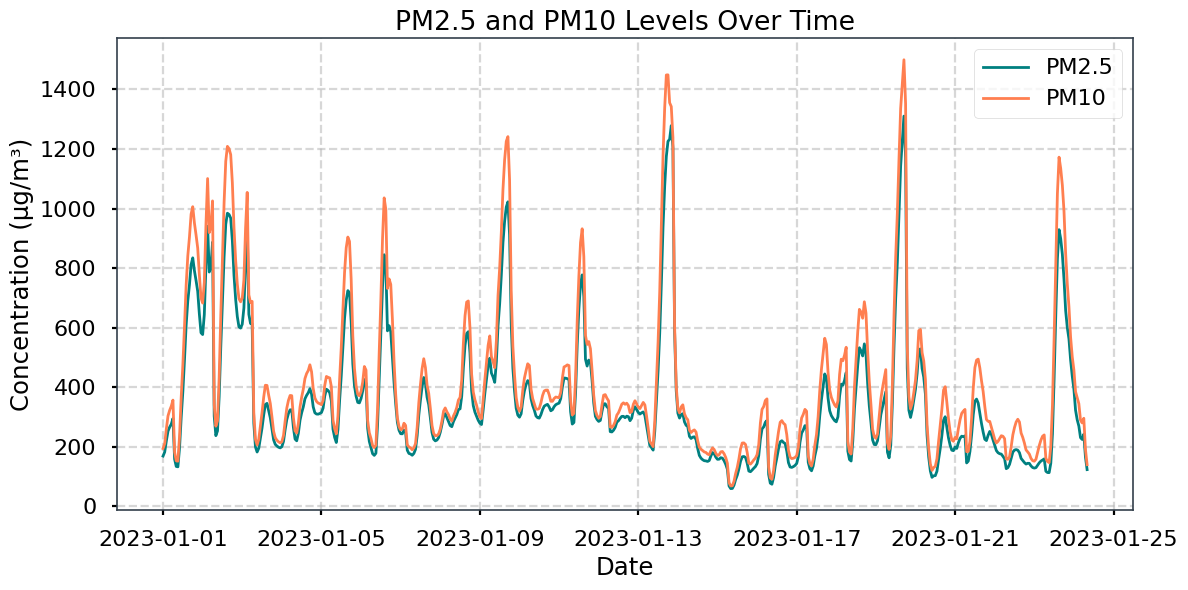

In [31]:
# Step 4: Visualize AQI, PM2.5, and PM10 trends over time

# Set figure size for clarity
plt.figure(figsize=(12, 6))

# Plot PM2.5 and PM10 trends
plt.plot(df_aqi['date'], df_aqi['pm2_5'], label='PM2.5', color='teal', linewidth=2)
plt.plot(df_aqi['date'], df_aqi['pm10'], label='PM10', color='coral', linewidth=2)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('PM2.5 and PM10 Levels Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipython-input-32-4255251993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_pm25, x='Hour', y='pm2_5', palette='cubehelix')


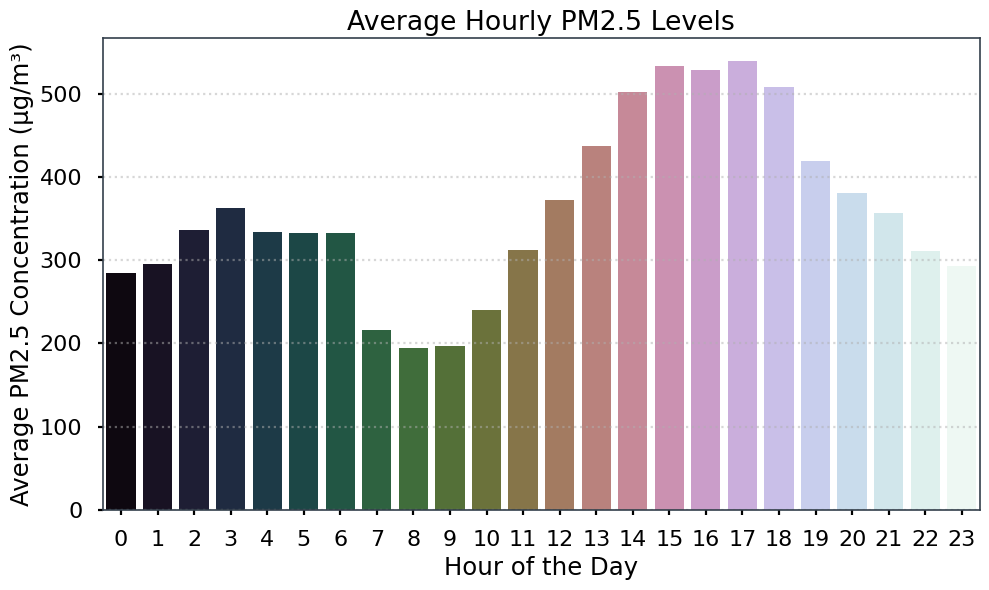

In [32]:
# Step 5: Bar Plot of Average PM2.5 Levels by Hour

# Group data by hour and calculate mean
hourly_pm25 = df_aqi.groupby('Hour')['pm2_5'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_pm25, x='Hour', y='pm2_5', palette='cubehelix')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.title('Average Hourly PM2.5 Levels')

# Show grid for clarity
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


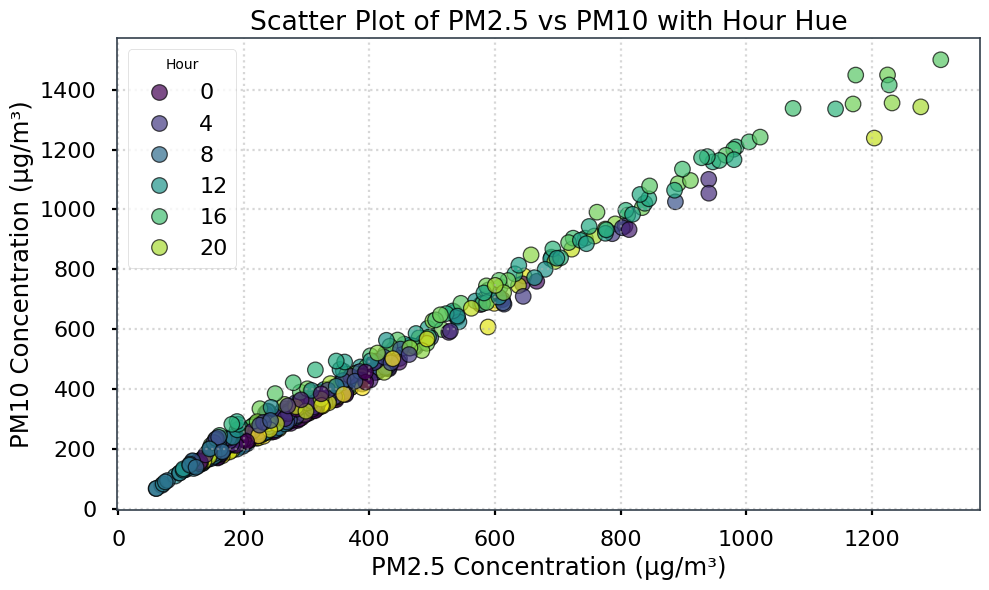

In [33]:
# Step 6: Scatter Plot of PM2.5 vs PM10

plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=df_aqi, x='pm2_5', y='pm10', hue='Hour', palette='viridis', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('PM10 Concentration (µg/m³)')
plt.title('Scatter Plot of PM2.5 vs PM10 with Hour Hue')

# Show grid
plt.grid(True, linestyle=':', alpha=0.5)

# Display plot
plt.tight_layout()
plt.show()


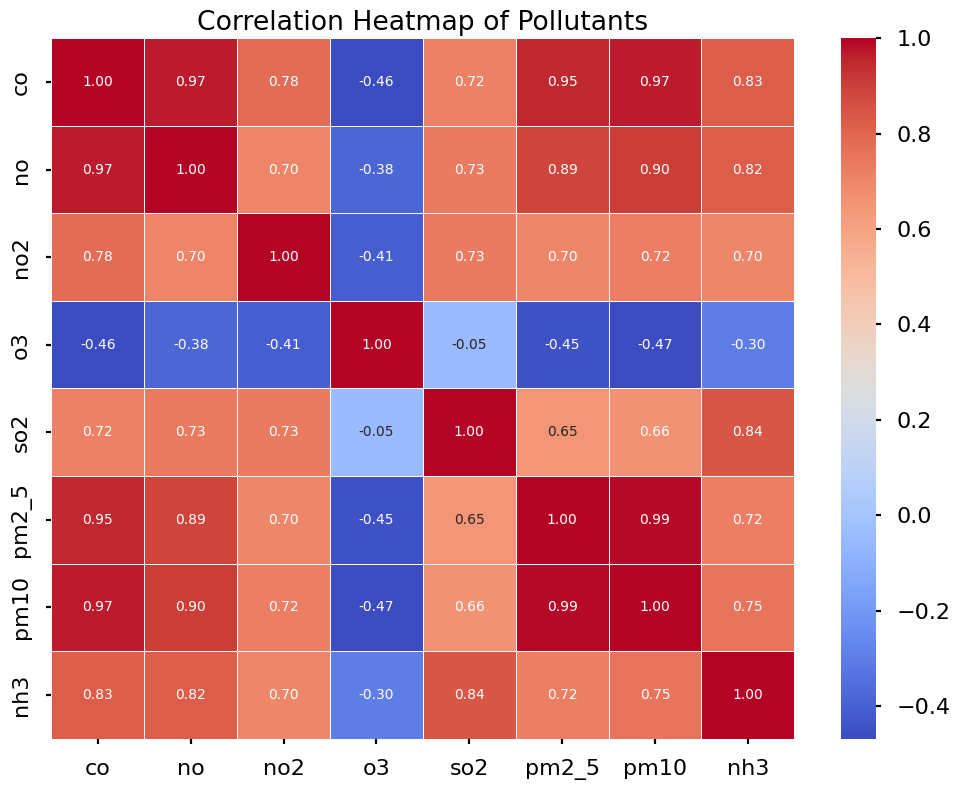

In [34]:
# Step 7: Heatmap of Correlation Between Pollutants

# Select pollutant columns for correlation
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Calculate correlation matrix
corr_matrix = df_aqi[pollutant_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Title
plt.title('Correlation Heatmap of Pollutants')

# Display
plt.tight_layout()
plt.show()


# Step 8: Insights for Documentation

insights = """
Insights:
1️⃣ PM2.5 and PM10 levels show periodic spikes, indicating high pollution days.
2️⃣ Peak PM2.5 levels occur during early morning and evening hours.
3️⃣ Strong positive correlation exists between PM2.5 and PM10 levels.
4️⃣ Correlation analysis helps understand pollutant relationships for forecasting and policy actions.
"""
print(insights)
